In [25]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
import numpy as np
from numpy import expand_dims

In [23]:
# load dataset
data = load('orangtu-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

data1=1
data2=2
test1=data2

testX = np.array([trainX[test1]])
trainX = np.array([trainX[data1], trainX[data2]])
trainy = np.array([0,1])
#print(trainX[1].shape)
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
z = model.predict(testX)
z

array([1])

In [15]:
z = model.predict(testX)
z

array([0])

In [108]:
# load dataset
data = load('orangtu-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

data1=1
data2=2
test1=data2

testX = np.array([trainX[test1]])
trainX = np.concatenate((trainX[data1], trainX[data2]), axis=0)
trainX = np.reshape(trainX, (1, -1))
trainy = np.array((([0,1])))
trainy = np.reshape(trainy, (1, -1))
print(trainX.shape)
print(trainy.shape)

(1, 256)
(1, 2)


In [109]:
#print(trainX[1].shape)
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
z = model.predict(testX)
z

ValueError: bad input shape (1, 2)

In [44]:
# load dataset
data = load('orangtu-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
target = trainy

def svmwajah (trainX, trainy, data1, data2):
    test1 = data2
    
    testX = np.array([trainX[test1]])
    trainX = np.concatenate((trainX[data1], trainX[data2]), axis=0)
    trainX = np.reshape(trainX, (-1, 1))
    
    trainy = np.array([1])
    out_encoder = LabelEncoder()
    out_encoder.fit(trainy)
    trainy = out_encoder.transform(trainy)

    model = SVC(kernel='linear', probability=True)
    model.fit(trainX, trainy)
    # predict
    a = model.predict_proba(testX)
    c = np.argmax(a)
    h = a[0][c]
    #nm = trainy[c]
    return a

s = svmwajah(trainX, trainy,1,12)
s

ValueError: Found input variables with inconsistent numbers of samples: [256, 1]

In [63]:
# load dataset
data = load('orangtu-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
target = trainy

trainX = np.concatenate((trainX[data1], trainX[data2]), axis=0)
trainy = np.array([1])

print(trainX.shape)
print(trainy.shape)

(256,)
(1,)


In [60]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
c = np.concatenate((a, b), axis=0)
print(a)
print(b)
print(c)

[[1 2]
 [3 4]]
[[5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [5]:
data = load('orangtu-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

data1=45
data2=46
#test1 = data1
    
#if trainy[data1] == trainy[data2]:
trainy[data1]=trainy[data1][0:5]+'1'

trainy[data1]

'jeric1'

In [6]:
testX = np.array([trainX[test1]])
trainX = np.array([trainX[data1],trainX[data2]])
trainy = np.array([trainy[data1],trainy[data2]])

model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
a = model.predict_proba(testX)
c = np.argmax(a)
h = a[0][c]
h

NameError: name 'test1' is not defined

In [73]:
trainy[45]

IndexError: index 45 is out of bounds for axis 0 with size 2

In [7]:
distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(trainX)

for i in range(num - 1):
    for j in range(i + 1, num):
        data = load('orangtu-embeddings.npz')
        trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
        if i != j:
            distances.append(svmwajah(trainX, trainy,i,j))
            identical.append(1 if target[i] == target[j] else 0)
        
distances = np.array(distances)
identical = np.array(identical)

In [8]:
from matplotlib import pyplot as plt

No handles with labels found to put in legend.
No handles with labels found to put in legend.


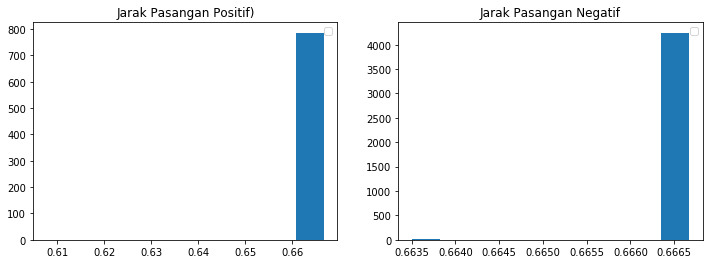

In [9]:
dist_pos = distances[identical == 1]
dist_neg = distances[identical == 0]

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(dist_pos)
plt.title('Jarak Pasangan Positif)')
plt.legend();

plt.subplot(122)
plt.hist(dist_neg)
plt.title('Jarak Pasangan Negatif')
plt.legend();

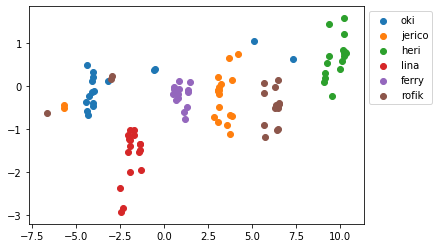

In [13]:
from sklearn.manifold import TSNE
from matplotlib import pyplot

X_embedded = TSNE(n_components=1).fit_transform(trainX)

for i, t in enumerate(set(targets)):
    idx = targets == t
    pyplot.scatter(X_embedded[idx, 0], trainX[idx, 1], label=t)   

pyplot.legend(bbox_to_anchor=(1, 1));


In [1]:
import seaborn as sn